# Simplified Test Notebook – Updated Models
This notebook tests **all updated style models** (blur, night_vis, poster, outline)
in a clean and simple workflow.

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

BASE_TEST = "/Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/test/img"
MODEL_DIR = "/Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/models/upd"
RESULT_DIR = "/Users/amayakof/Desktop/2025_autumn/deep_learning/SIS/3/project/results"

os.makedirs(RESULT_DIR, exist_ok=True)

STYLES = ["blur", "night_vis", "poster", "outline"]
IMAGE_SIZE = (256, 256)

def load_test_images(folder):
    imgs, names = [], []
    for fname in sorted(os.listdir(folder)):
        if fname.lower().endswith((".png", ".jpg", ".jpeg", ".bmp", ".tiff")):
            path = os.path.join(folder, fname)
            img = cv2.imread(path)
            if img is None:
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, IMAGE_SIZE)
            img = img.astype("float32") / 255.0
            imgs.append(img)
            names.append(fname)
    return np.array(imgs), names

test_imgs, test_names = load_test_images(BASE_TEST)
print("Loaded test images:", test_imgs.shape)

Loaded test images: (4, 256, 256, 3)


In [2]:
def show_results(style, inputs, outputs, names):
    n = len(inputs)
    plt.figure(figsize=(6, n * 2))

    for i in range(n):
        plt.subplot(n, 2, i*2 + 1)
        plt.imshow(inputs[i])
        plt.title(names[i], fontsize=8)
        plt.axis("off")

        plt.subplot(n, 2, i*2 + 2)
        plt.imshow(outputs[i])
        plt.title(f"{style} output", fontsize=8)
        plt.axis("off")

    plt.tight_layout()
    plt.show()


===== Testing BLUR =====
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


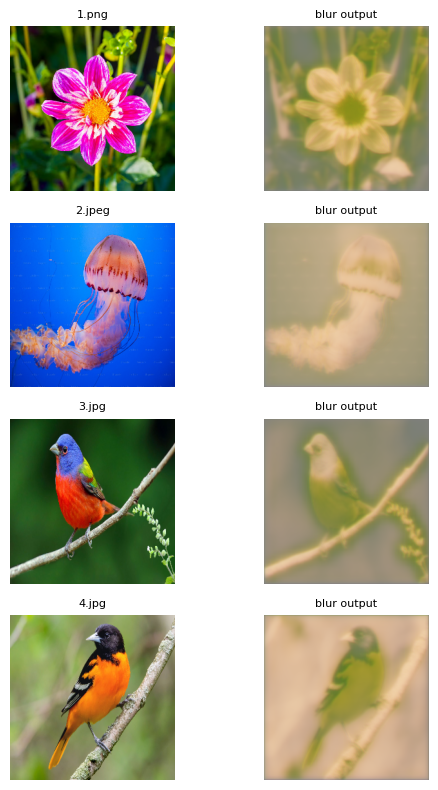


===== Testing NIGHT_VIS =====
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step


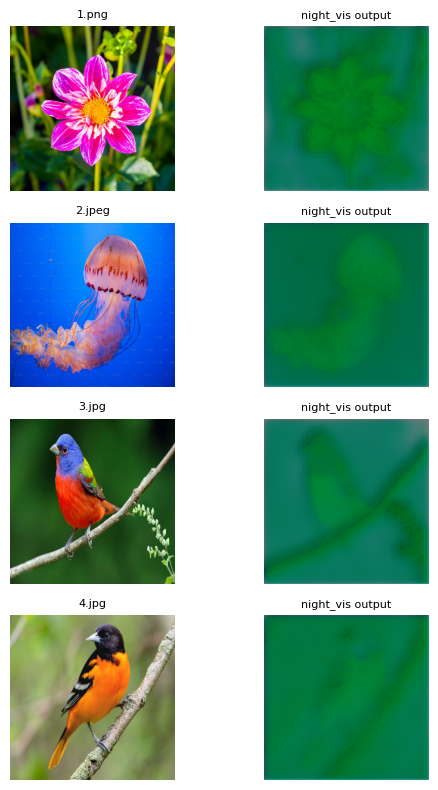


===== Testing POSTER =====
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


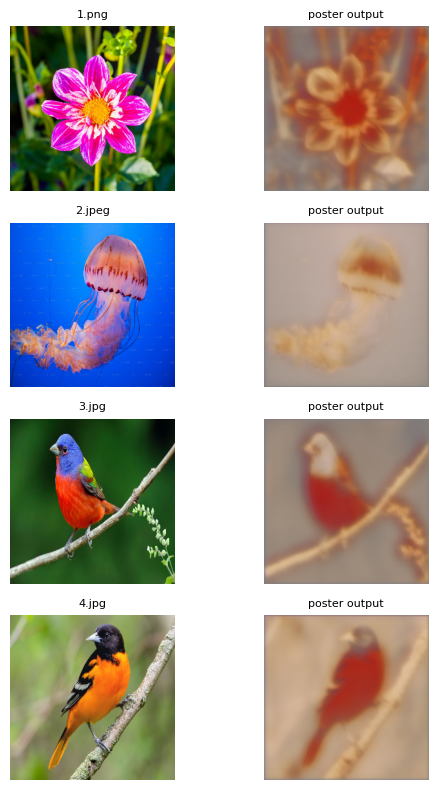


===== Testing OUTLINE =====
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


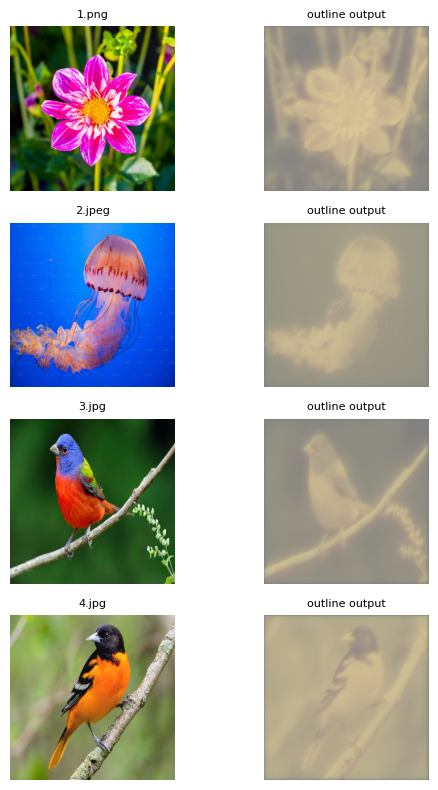

In [3]:
for style in STYLES:
    print(f"\n===== Testing {style.upper()} =====")

    model_path = os.path.join(MODEL_DIR, f"autoencoder_{style}_upd.keras")
    if not os.path.exists(model_path):
        print("Model missing:", model_path)
        continue

    model = load_model(model_path)
    preds = model.predict(test_imgs)

    # Save outputs
    out_dir = os.path.join(RESULT_DIR, style)
    os.makedirs(out_dir, exist_ok=True)
    for arr, fname in zip(preds, test_names):
        out = (arr * 255).astype(np.uint8)
        out = cv2.cvtColor(out, cv2.COLOR_RGB2BGR)
        cv2.imwrite(os.path.join(out_dir, fname), out)

    show_results(style, test_imgs, preds, test_names)